In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_set=pd.read_csv(r'diabetes.csv')
train_set=data_set[0:600]
test_set=data_set[600:769]
train_set=np.array(train_set)
test_set=np.array(test_set)

x_train=train_set[:,:8]
y_train=train_set[:,8]
y_train=y_train.reshape((1,600))

x_test=test_set[:,:8]
y_test=test_set[:,8]
y_test=y_test.reshape((1,168))

x_train=x_train.T
x_test=x_test.T

def z_normalization(X):
    m = np.mean(X, axis=1, keepdims=True)
    sig = np.std(X, axis=1, keepdims=True)
    normalized_x = (X - m) / sig
    return normalized_x
x_train=z_normalization(x_train)
x_test=z_normalization(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 600)
(8, 168)
(1, 600)
(1, 168)


In [3]:
# data_set=pd.read_csv('breast_cancer.csv')
# print(data_set.head())
# train_set=data_set[0:500]
# test_set=data_set[500:683]
# train_set=np.array(train_set)
# test_set=np.array(test_set)

In [4]:
# x_train=train_set[:,:9]
# y_train=train_set[:,9]
# y_train=y_train.reshape((1,500))

In [5]:
# print(y_train)

In [6]:
# x_test=test_set[:,:9]
# y_test=test_set[:,9]
# y_test=y_test.reshape((1,183))
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

In [7]:
# y_train=np.where(y_train==2,0,1)
# y_test=np.where(y_test==2,0,1)
# print(y_test)

# # def z_normalization(X):
# #     m = np.mean(X, axis=1, keepdims=True)
# #     sig = np.std(X, axis=1, keepdims=True)
# #     normalized_x = (X - m) / sig
# #     return normalized_x
# # x_train=z_normalization(x_train)
# # x_test=z_normalization(x_test)

In [8]:
def predict(x,w,b):
    z=np.dot(w,x)+b
    return sigmoid(z)
def sigmoid(z):
    g_z=1/(1+np.exp(-z))
    return g_z

In [9]:
def compute_cost(x,y,w,b):
    m=x.shape[1]
    f_wb=predict(x,w,b)
    cost=np.sum(y*np.log(f_wb)+(1-y)*np.log(1-f_wb),axis=1,keepdims=False)
    cost=-cost/m
    return cost

In [72]:
def compute_gradient(x,y,w,b):
    m=x.shape[1]
    f_wb=predict(x,w,b)
    dj_dw=np.dot(f_wb-y,x.T)
    dj_db=np.sum(f_wb-y,axis=1,keepdims=True)
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

In [197]:
def gradient_descent(x,y,alpha,num_iter):
    m=x.shape[1]
    n=x.shape[0]
    # w=np.zeros((1,n))
    w=np.random.randn(1,n)*np.sqrt(1/n)
    b=0.0
    j_cost=[]
    j_it=[]
    for i in range(num_iter):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        if i%100==0 or i==num_iter-1:
            temp_cost=compute_cost(x,y,w,b)
            j_cost.append(temp_cost)
            j_it.append(i)
    return w,b,j_cost,j_it

In [198]:
def actual(y):
    return np.where(y>=0.5,1,0)

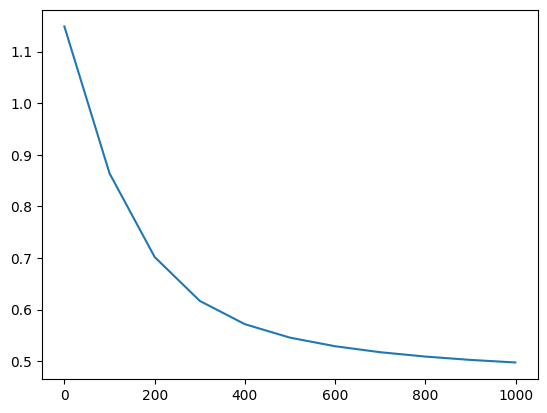

In [233]:
alpha=0.009
itera=1000
w_f,b_f,j_cost,j_it=gradient_descent(x_train,y_train,alpha,itera)
plt.plot(j_it,j_cost)

In [234]:
def compute_accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)
y_pre=actual(predict(x_test,w_f,b_f))
print(f"Accuracy:{compute_accuracy(y_pre,y_test)*100}")

Accuracy:79.76190476190477
